In [2]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

In [3]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
from scipy.optimize import curve_fit, minimize




Populating the interactive namespace from numpy and matplotlib


In [4]:
%autoreload

# Parameters used for generating map

In [5]:
nside = 128
A = 1.7e3
alpha = -3.0
beta = -3.2
gamma = -2.5
ells = np.arange(3*nside)
freqs = np.linspace(30, 300, 5)*1.e9

# Generate model using input parameters for comparison

In [7]:
start=time.time()
model_true = ff.model(freqs, A, alpha, beta, gamma)
print(time.time()-start)

1.3526930809020996


# Want to get 1d fits working first
cannot fit for $\beta$ in this case as it is completely degenerate with amplitude.

Model (auto spectrum at freqency $\nu$) - up to normalisation of the SED to the Planck function. Note that $A_\beta$ is totally specified by $\gamma$ to fix the standard deviation of the betamap.

$$
C_\ell(0\times0) = \left(\frac{\nu}{\nu_0}\right)^{2\beta} \times A \left(\frac{\ell}{80}\right)^\alpha 
$$

$$
C_\ell(1\times1) = \left(\frac{\nu}{\nu_0}\right)^{2\beta}\log^2\left(\frac{\nu}{\nu_0}\right) \times \sum_{\ell_1\ell_2}\frac{(2\ell_1+1)(2\ell_2+1)}{4\pi} \begin{pmatrix}\ell & \ell_1 & \ell_2 \\ 0 & 0 & 0\end{pmatrix}^2 A \left(\frac{\ell_1}{80}\right)^\alpha A_\beta \left(\frac{\ell_2}{80}\right)^\gamma
$$

$$
\begin{align}
C_\ell(0\times2) &= \left(\frac{\nu}{\nu_0}\right)^{2\beta}\log^2\left(\frac{\nu}{\nu_0}\right) A \left(\frac{\ell}{80}\right)^\alpha \times \sum_{\ell_1} \frac{(2\ell_1+1)}{4\pi} A_\beta \left(\frac{\ell_1}{80}\right)^\gamma \\
&= \left(\frac{\nu}{\nu_0}\right)^{2\beta}\log^2\left(\frac{\nu}{\nu_0}\right)A \left(\frac{\ell}{80}\right)^\alpha  \times \frac{A_\beta}{4\pi \ 80^\gamma} \sum_{\ell_1}(2\ell_1+1) \ell_1^\gamma \\
&= \left(\frac{\nu}{\nu_0}\right)^{2\beta}\log^2\left(\frac{\nu}{\nu_0}\right) A \left(\frac{\ell}{80}\right)^\alpha \times \frac{A_\beta}{4\pi \ 80^\gamma} \times \left[ 2\zeta(-\gamma-1)+\zeta(-\gamma)-3 \right]
\end{align}
$$

So then, factoring out the appropriate factors, we can write the full model to first order as

$$
C_\ell(0\times0+1\times1+0\times2) = A \cdot \mathrm{SED}^2(\nu,\beta) \left\{  \left(\frac{\ell}{80}\right)^\alpha  + \frac{A_\beta(\gamma)}{4\pi \ 80^\gamma} \log^2\left(\frac{\nu}{\nu_0}\right)\left[  2\zeta(-\gamma-1) + \zeta(-\gamma)-3 + \frac{1}{80^\alpha}\sum_{\ell_1\ell_2}(2\ell_1+1)(2\ell_2+1) W_{\ell\ell_1\ell_2}^2 \ell_1^\alpha  \ell_2^\gamma     \right]     \right\}
$$

In [8]:
data = ff.PS_data(freqs, A, alpha, beta, gamma)

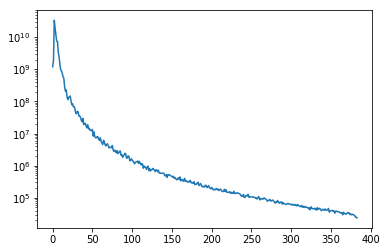

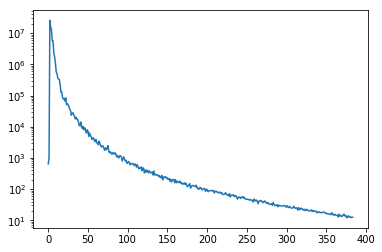

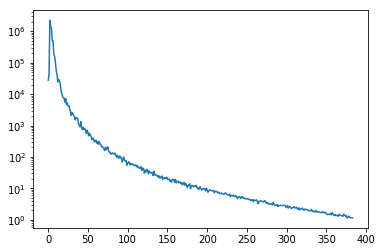

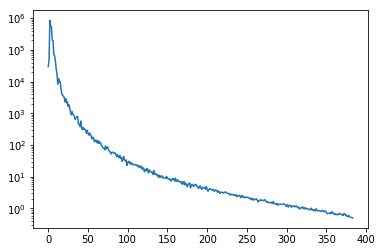

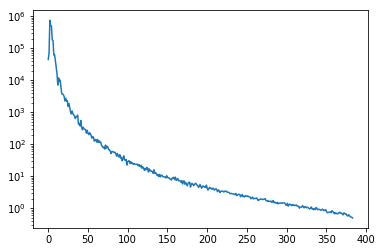

In [9]:
for i in range(len(freqs)):
    figure()
    semilogy(data[i])